<a href="https://colab.research.google.com/github/hemu2014/python-data-test/blob/main/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0-ML/TensorFlow_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow 2.0 Introduction
In this notebook you will be given an interactive introduction to TensorFlow 2.0. We will walk through the following topics within the TensorFlow module:

- TensorFlow Install and Setup
- Representing Tensors
- Tensor Shape and Rank
- Types of Tensors


If you'd like to follow along without installing TensorFlow on your machine you can use **Google Collaboratory**. Collaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

##Installing TensorFlow
To install TensorFlow on your local machine you can use pip.
```console
pip install tensorflow
```

![alt text](https://)If you have a CUDA enabled GPU you can install the GPU version of TensorFlow. You will also need to install some other software which can be found here: https://www.tensorflow.org/install/gpu
```console
pip install tensorflow-gpu
```

## Importing TensorFlow
The first step here is going to be to select the correct version of TensorFlow from within collabratory!


In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook此行在笔记本中不需要

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow as tf  # now import the tensorflow module
print(tf.version)  # make sure the version is 2.x

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/version/__init__.py'>


##Tensors
"A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes." (https://www.tensorflow.org/guide/tensor)

It should't surprise you that tensors are a fundemental apsect of TensorFlow. They are the main objects that are passed around and manipluated throughout the program. Each tensor represents a partialy defined computation that will eventually produce a value. TensorFlow programs work by building a graph of Tensor objects that details how tensors are related. Running different parts of the graph allow results to be generated.

Each tensor has a data type and a shape.

**Data Types Include**: float32, int32, string and others.

**Shape**: Represents the dimension of data.

Just like vectors and matrices tensors can have operations applied to them like addition, subtraction, dot product, cross product etc.

In the next sections we will discuss some different properties of tensors. This is to make you more familiar with how tensorflow represnts data and how you can manipulate this data.


###Creating Tensors
Below is an example of how to create some different tensors.

You simply define the value of the tensor and the datatype and you are good to go! It's worth mentioning that usually we deal with tensors of numeric data, it is quite rare to see string tensors.

For a full list of datatypes please refer to the following guide.

https://www.tensorflow.org/api_docs/python/tf/dtypes/DType?version=stable

In [3]:
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

In [4]:
print(string)
print(number)
print(floating)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'this is a string'>
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=324>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.566999912261963>


###Rank/Degree of Tensors
Another word for rank is degree, these terms simply mean the number of dimensions involved in the tensor. What we created above is a *tensor of rank 0*, also known as a scalar.

Now we'll create some tensors of higher degrees/ranks.

In [5]:
rank1_tensor = tf.Variable(["Test"], tf.string)
rank2_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)

**To determine the rank** of a tensor we can call the following method.

###rank()方法---确定张量的秩

In [12]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

The rank of a tensor is direclty related to the deepest level of nested lists. You can see in the first example ```["Test"]``` is a rank 1 tensor as the deepest level of nesting is 1.
Where in the second example ```[["test", "ok"], ["test", "yes"]]``` is a rank 2 tensor as the deepest level of nesting is 2.

###Shape of Tensors
Now that we've talked about the rank of tensors it's time to talk about the shape. The shape of a tensor is simply the number of elements that exist in each dimension. TensorFlow will try to determine the shape of a tensor but sometimes it may be unknown.

To **get the shape** of a tensor we use the shape attribute.


###shape--要获取张量的形状，我们使用 shape 属性。

In [20]:
rank2_tensor.shape

TensorShape([2, 2])

###Changing Shape
The number of elements of a tensor is the product of the sizes of all its shapes. There are often many shapes that have the same number of elements, making it convient to be able to change the shape of a tensor.

The example below shows how to change the shape of a tensor.

###reshape()--更改张量的形状。-1--他会自动计算剩余shape

In [16]:
tensor1 = tf.ones([1,2,3])  # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1])  # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1])  # -1 tells the tensor to calculate the size of the dimension in that place
tensor4 = tf.reshape(tensor3, [-1, 3])
tensor5 = tf.reshape(tensor4, [-1])                                        # this will reshape the tensor to [3,-1]

# The numer of elements in the reshaped tensor MUST match the number in the original

Now let's have a look at our different tensors.

In [17]:
print(tensor1)
print(tensor2)
print(tensor3)
print(tensor4)
print(tensor5)
# Notice the changes in shape

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor([1. 1. 1. 1. 1. 1.], shape=(6,), dtype=float32)


In [18]:
print(tf.rank(tensor1))
print(tf.rank(tensor2))
print(tf.rank(tensor3))
print(tf.rank(tensor4))
print(tf.rank(tensor5))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [24]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

###一个是numpy类型，一个是tensor类型

In [23]:
tf.reduce_max([1,2,3])

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [26]:
import numpy as np
tf.reduce_max(np.array([1,2,3]))

<tf.Tensor: shape=(), dtype=int64, numpy=3>

###默认 axis=None：将张量扁平化后返回索引。

指定轴（如 axis=0 （垂直）或 axis=1（水平））时，按行/列返回索引：
tip:
在 TensorFlow 2.x 版本中，tf.math.argmax() 的 axis=None 的默认行为与文档描述不一致，实际行为是：

如果输入是 N 维张量（N≥2）且 axis=None，会隐式转换为 axis=0（按列计算），而不是真正的扁平化全局索引。
# 方法：先扁平化再求索引
-flattened = tf.reshape(c, [-1])  # 转换为1D张量 [4.0, 5.0, 10.0, 1.0, 3.0, 5.0]
-print(tf.math.argmax(flattened))  # 输出 2（10.0的全局索引）

In [36]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0], [3.0, 5.0]])

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.math.argmax(c, axis=0))  #垂直方向
print(tf.math.argmax(c, axis=1))  #水平方向
d = tf.reshape(c, [-1])
print(d)
print(tf.math.argmax(d, axis=None))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor([1 0 1], shape=(3,), dtype=int64)
tf.Tensor([ 4.  5. 10.  1.  3.  5.], shape=(6,), dtype=float32)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]
 [1.1920291e-01 8.8079703e-01]], shape=(3, 2), dtype=float32)


###Slicing Tensors
You may be familiar with the term "slice" in python and its use on lists, tuples etc. Well the slice operator can be used on tensors to select specific axes or elements.

When we slice or select elements from a tensor, we can use comma seperated values inside the set of square brackets. Each subsequent value refrences a different dimension of the tensor.

Ex: ```tensor[dim1, dim2, dim3]```

I've included a few examples that will hopefully help illustrate how we can manipulate tensors with the slice operator.

###与numpy操作数据类似，切片操作符来操作张量。

In [19]:
# Creating a 2D tensor
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = tf.Variable(matrix, dtype=tf.int32)
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


In [22]:
# Now lets select some different rows and columns from our tensor

three = tensor[0,2]  # selects the 3rd element from the 1st row
print(three)  # -> 3

row1 = tensor[0]  # selects the first row
print(row1)

column1 = tensor[:, 0]  # selects the first column
print(column1)

row_2_and_4 = tensor[1::2]  # selects second and fourth row
print(row_2_and_4)

column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)


tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


###Types of Tensors
Before we go to far, I will mention that there are diffent types of tensors. These are the most used and we will talk more in depth about each as they are used.
- Variable
- Constant
- Placeholder
- SparseTensor

With the execption of ```Variable``` all these tensors are immuttable, meaning their value may not change during execution.

For now, it is enough to understand that we use the Variable tensor when we want to potentially change the value of our tensor.



###补充

###Tensor.ndim 和 Tensor.shape 特性不返回 Tensor 对象。如果您需要 Tensor，请使用 tf.rank 或 tf.shape 函数。这种差异不易察觉，但在构建计算图时（稍后）可能非常重要。

In [50]:
rank_5_tensor = tf.zeros([3, 2, 4, 5])
tf.shape(rank_5_tensor)
print(type(tf.shape(rank_5_tensor)), tf.shape(rank_5_tensor).numpy())
print(type(rank_5_tensor.shape))
print(tf.shape(rank_5_tensor))
print("rank:", tf.rank(rank_5_tensor))
print("size:",tf.size(rank_5_tensor))
print(rank_5_tensor.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> [3 2 4 5]
<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
tf.Tensor([3 2 4 5], shape=(4,), dtype=int32)
rank: tf.Tensor(4, shape=(), dtype=int32)
size: tf.Tensor(120, shape=(), dtype=int32)
(3, 2, 4, 5)


In [40]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])
print(type(rank_4_tensor.ndim), type(rank_4_tensor.shape))
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor))
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

<class 'int'> <class 'tensorflow.python.framework.tensor_shape.TensorShape'>
Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  tf.Tensor(120, shape=(), dtype=int32)
Total number of elements (3*2*4*5):  120


In [51]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


###使用标量编制索引会移除轴：

In [52]:
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())

First: 0
Second: 1
Last: 34


###使用 : 切片编制索引会保留轴：

In [53]:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


###为每个索引传递一个整数，结果是一个标量。

In [54]:
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
# Pull out a single value from a 2-rank tensor
print(rank_2_tensor[1, 1].numpy())

4.0


In [55]:
# Get row and column tensors
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



In [59]:
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor[:, :, 4])
print(rank_3_tensor[:, 1, 4])
print(rank_3_tensor[1, 1, 4])
print(rank_3_tensor[0, :, :2])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)
tf.Tensor([ 9 19 29], shape=(3,), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)
tf.Tensor(
[[0 1]
 [5 6]], shape=(2, 2), dtype=int32)


###as_list()--转为python列表

In [60]:
# Shape returns a `TensorShape` object that shows the size along each axis
x = tf.constant([[1], [2], [3]])
print(x.shape)
# You can convert this object into a Python list, too
print(x.shape.as_list())

(3, 1)
[3, 1]


###数据在内存中的布局保持不变，
###同时使用请求的形状创建一个指向同一数据的新张量。TensorFlow 采用 C 样式的“行优先”内存访问顺序，即最右侧的索引值递增对应于内存中的单步位移。

###如果您展平张量，则可以看到它在内存中的排列顺序。

In [62]:
# A `-1` passed in the `shape` argument says "Whatever fits".
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


###一般来说，tf.reshape 唯一合理的用途是用于合并或拆分相邻轴（或添加/移除 1）。

对于 3x2x5 张量，重构为 (3x2)x5 或 3x(2x5) 都合理，因为切片不会混淆：
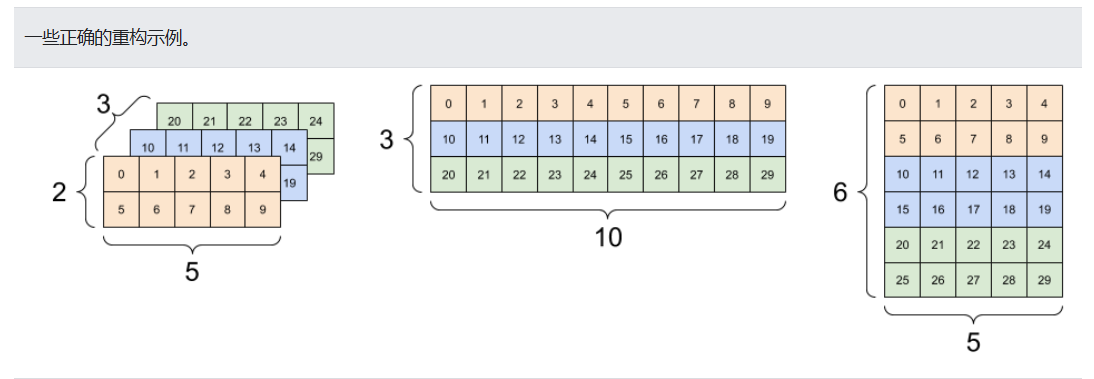

In [63]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


###重构可以处理总元素个数相同的任何新形状，但是如果不遵从轴的顺序，则不会发挥任何作用。

利用 tf.reshape 无法实现轴的交换，**要交换轴，您需要使用 tf.transpose。**

In [66]:
# Bad examples: don't do this

# You can't reorder axes with reshape.
print(tf.reshape(rank_3_tensor, [2, 3, 5]), "\n")

# This is a mess
print(tf.reshape(rank_3_tensor, [5, 6]), "\n")

# This doesn't work at all
try:
  tf.reshape(rank_3_tensor, [7, -1])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32) 

InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


###DTypes 详解
* 使用 **Tensor.dtype** 属性可以检查 tf.Tensor 的数据类型。







* 从 Python 对象创建 **tf.Tensor 时，您可以选择指定数据类型。**

* 如果不指定，TensorFlow 会选择一个可以表示您的数据的数据类型。TensorFlow 将 Python 整数转换为 tf.int32，将 Python 浮点数转换为 tf.float32。另外，当转换为数组时，TensorFlow 会采用与 NumPy 相同的规则。

* 数据类型可以相互转换。

In [69]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
print(the_f64_tensor.dtype)
print(the_f64_tensor)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
print(the_f16_tensor)
# Now, cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

<dtype: 'float64'>
tf.Tensor([2.2 3.3 4.4], shape=(3,), dtype=float64)
tf.Tensor([2.2 3.3 4.4], shape=(3,), dtype=float16)
tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


###广播
* 广播是从 NumPy 中的等效功能借用的一个概念。简而言之，在一定条件下，对一组张量执行组合运算时，为了适应大张量，会对小张量进行“扩展”。

* 最简单和最常见的例子是尝试将**张量与标量相乘或相加**。在这种情况下会对标量进行广播，使**其变成与其他参数相同的形状。**

In [70]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


###同样，可以扩展长度为 1 的轴，使其匹配其他参数。在同一个计算中可以同时扩展两个参数。

在本例中，一个 **3x1 的矩阵与一个 1x4 进行元素级乘法运算，**从而产生一个 3x4 的矩阵。注意**前导 1 是可选的：y 的形状是 [4]。**

In [71]:
# These are the same computations
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)  # 生成一个,[1,2,3,4]数组
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


###下面是不使用广播的同一运算：

In [72]:
x_stretch = tf.constant([[1, 1, 1, 1],
                         [2, 2, 2, 2],
                         [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)  # Again, operator overloading

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


###在大多数情况下，广播的时间和空间效率更高，因为广播运算不会在内存中具体化扩展的张量。

使用 **tf.broadcast_to** 可以了解广播的运算方式。

In [73]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


In [80]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3]))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [79]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [2,3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]], shape=(2, 3), dtype=int32)


##不规则张量
如果张量的某个轴上的元素个数可变，则称为“不规则”张量。对于不规则数据，**请使用 tf.ragged.RaggedTensor。**

例如，下面的例子无法用规则张量表示：
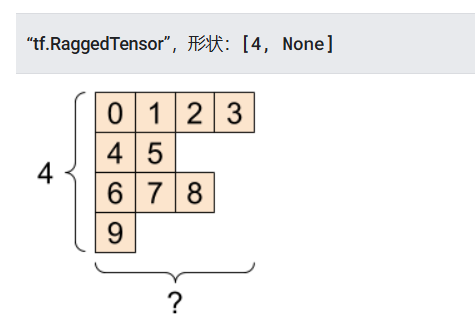

In [ ]:
“tf.RaggedTensor”,形状：[4, None]

In [81]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

###无法将非矩形 Python 序列转换为 Tensor。

In [82]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Can't convert non-rectangular Python sequence to Tensor.


###应使用** tf.ragged.constant** 来创建 **tf.RaggedTensor：**

In [83]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


###tf.RaggedTensor 的形状将包含一些**具有未知长度的轴：**

In [84]:
print(ragged_tensor.shape)

(4, None)


###字符串张量
* tf.string 是一种 dtype，也就是说，在张量中，您可以用字符串（可变长度字节数组）来表示数据。

* 字符串是原子类型，无法像 Python 字符串一样编制索引。字符串的长度并不是张量的一个轴。有关操作字符串的函数，请参阅 tf.strings。

下面是一个标量字符串张量：

In [85]:
# Tensors can be strings, too here is a scalar string.
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor)

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


###下面是一个字符串向量：
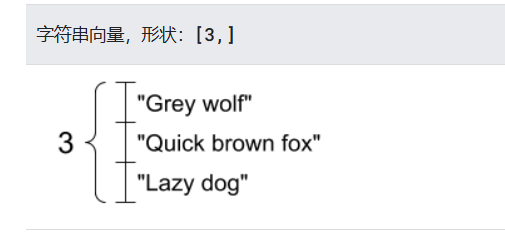

In [86]:
# If you have three string tensors of different lengths, this is OK.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# Note that the shape is (3,). The string length is not included.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


###在上面的打印输出中，b 前缀表示 tf.string dtype 不是 Unicode 字符串，而是字节字符串。有关在 TensorFlow 如何使用 Unicode 文本的详细信息，请参阅 Unicode 教程。

如果传递 **Unicode 字符，则会使用 utf-8 编码。**

In [87]:
tf.constant("🥳👍")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'>

###在 tf.strings 中可以找到用于操作字符串的一些基本函数，包括 tf.strings.split。

In [88]:
# You can use split to split a string into a set of tensors
print(tf.strings.split(scalar_string_tensor, sep=" "))

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


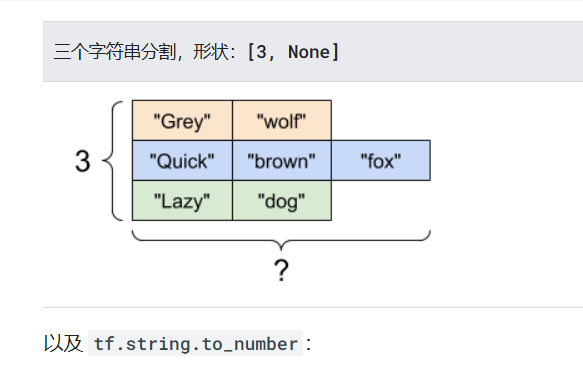

In [89]:
# ...but it turns into a `RaggedTensor` if you split up a tensor of strings,
# as each string might be split into a different number of parts.
print(tf.strings.split(tensor_of_strings))

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


###以及 tf.string.to_number：

In [90]:
text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text, " ")))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


###虽然不能使用 tf.cast 将字符串张量转换为数值，但是可以先将其转换为字节，然后转换为数值。

In [91]:
byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)
print("Byte strings:", byte_strings)
print("Bytes:", byte_ints)

Byte strings: tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
Bytes: tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


###tf.string dtype 可用于 TensorFlow 中的所有原始字节数据。tf.io 模块包含在数据与字节类型之间进行相互转换的函数，包括解码图像和解析 csv 的函数。

In [92]:
# Or split it up as unicode and then decode it
unicode_bytes = tf.constant("アヒル 🦆")
unicode_char_bytes = tf.strings.unicode_split(unicode_bytes, "UTF-8")
unicode_values = tf.strings.unicode_decode(unicode_bytes, "UTF-8")

print("\nUnicode bytes:", unicode_bytes)
print("\nUnicode chars:", unicode_char_bytes)
print("\nUnicode values:", unicode_values)


Unicode bytes: tf.Tensor(b'\xe3\x82\xa2\xe3\x83\x92\xe3\x83\xab \xf0\x9f\xa6\x86', shape=(), dtype=string)

Unicode chars: tf.Tensor([b'\xe3\x82\xa2' b'\xe3\x83\x92' b'\xe3\x83\xab' b' ' b'\xf0\x9f\xa6\x86'], shape=(5,), dtype=string)

Unicode values: tf.Tensor([ 12450  12498  12523     32 129414], shape=(5,), dtype=int32)


###稀疏张量
* 在某些情况下，数据很稀疏，比如说在一个非常宽的嵌入空间中。为了高效存储稀疏数据，TensorFlow ***支持 tf.sparse.SparseTensor 和相关运算。***
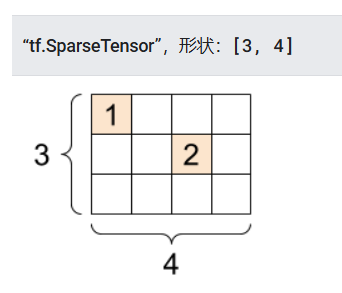

###sparse.SparseTensor
          (indices=[[0, 0], [1, 2]],  # 数据的索引--位置
          values=[1, 2],  # 值-数据
          dense_shape=[3, 4])  # 形状
* indices---数据的索引
* values -- 数据的值
* dense_shape---矩阵的形状
* tf.sparse.to_dense(sparse_tensor) --- **空的位置用0填充**

In [93]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],  # 数据的索引--位置
                          values=[1, 2],  # 值-数据
                          dense_shape=[3, 4])  # 形状
print(sparse_tensor, "\n")

# You can convert sparse tensors to dense
print(tf.sparse.to_dense(sparse_tensor))  # 空的位置用0填充

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


#Sources
Most of the information is taken direclty from the TensorFlow website which can be found below.

https://www.tensorflow.org/guide/tensor